## Titanic Disaster Survival

In [1]:
from IPython.display import Image
Image(url= "https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/5095eabce4b06cb305058603/5095eabce4b02d37bef4c24c/1352002236895/100_anniversary_titanic_sinking_by_esai8mellows-d4xbme8.jpg")

## TRAINING DATA
The training set should be used to build your machine learning models. 
For the training set, we provide the outcome (also known as the “ground truth”) 
for each passenger. Your model will be based on “features” like passengers’ gender and class.
You can also use feature engineering to create new features.

## TESTING DATA
The test set should be used to see how well your model performs on unseen data. 
For the test set, we do not provide the ground truth for each passenger. 
It is your job to predict these outcomes. For each passenger in the test set, 
use the model you trained to predict whether or not they survived the sinking of the Titanic.

## Data description
    Survived: 0 = Did not survive, 1 = Survived

    Pclass: Ticket class where 1 = First class, 2 = Second class, 3 = Third class. This can also be seen as a proxy for socio-economic status.

    Sex: Male or female

    Age: Age in years, fractional if less than 1

    SibSp: Number of siblings or spouses aboard the titanic

    Parch: Number of parents or children aboard the titanic

    Ticket: Passenger ticket number

    Fare: Passenger fare

    Cabin: Cabin number

    Embarked: Point of embarkation where C = Cherbourg, Q = Queenstown, S = Southampton


## IMPORT LIBRARIES

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
import matplotlib.patches as  mpatches

## IMPORTING THE DATASETS

In [3]:
train = pd.read_csv("../input/titanic/train.csv")

In [4]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
test = pd.read_csv("../input/titanic/test.csv")

In [7]:
test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [8]:
print("Training data shape: ", train.shape)
print("Testing data shape: ", test.shape)


Training data shape:  (891, 12)
Testing data shape:  (418, 11)


## EXPLORATORY DATA ANALYSIS (EDA)

In [9]:
print(train.info())
print("-----------------------------------------")
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
-----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pas

In [10]:
train.isnull().sum().sort_values(ascending = False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

<AxesSubplot:>

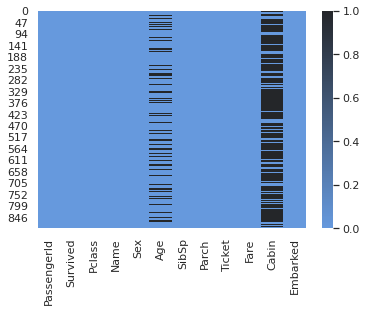

In [11]:
color = sns.dark_palette("#69d", reverse=True, as_cmap=True)
sns.heatmap(train.isnull(),cmap = color)

In [12]:
test.isnull().sum().sort_values(ascending = False)

Cabin          327
Age             86
Fare             1
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
dtype: int64

<AxesSubplot:>

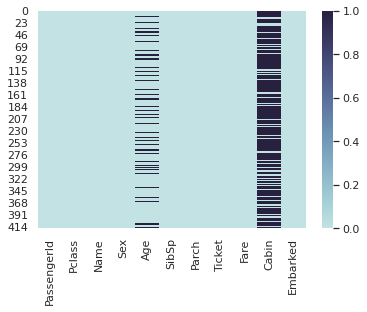

In [13]:
color = sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True)
sns.heatmap(test.isnull(),cmap = color)

## Summary Statistics of Training data

In [14]:
train.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891.0,NaN,NaN,NaN,446.0,257.353842,1.0,223.5,446.0,668.5,891.0
Survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Name,891,891,"Duff Gordon, Sir. Cosmo Edmund (""Mr Morgan"")",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
SibSp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Ticket,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


## Summary Statistics of Testing data

In [15]:
test.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,418.0,NaN,NaN,NaN,1100.5,120.810458,892.0,996.25,1100.5,1204.75,1309.0
Pclass,418.0,NaN,NaN,NaN,2.26555,0.841838,1.0,1.0,3.0,3.0,3.0
Name,418,418,"Fillbrook, Mr. Joseph Charles",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,418,2,male,266,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,332.0,NaN,NaN,NaN,30.27259,14.181209,0.17,21.0,27.0,39.0,76.0
SibSp,418.0,NaN,NaN,NaN,0.447368,0.89676,0.0,0.0,0.0,1.0,8.0
Parch,418.0,NaN,NaN,NaN,0.392344,0.981429,0.0,0.0,0.0,0.0,9.0
Ticket,418,363,PC 17608,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,417.0,NaN,NaN,NaN,35.627188,55.907576,0.0,7.8958,14.4542,31.5,512.3292
Cabin,91,76,B57 B59 B63 B66,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Feature Analysis

In [16]:
train["Sex"].value_counts(dropna = False)

male      577
female    314
Name: Sex, dtype: int64

In [17]:
# Mean of survival by sex
train[['Sex','Survived']].groupby('Sex',as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


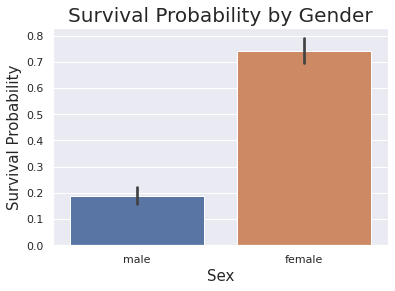

In [18]:
sns.barplot(x = "Sex",y = "Survived", data = train)
plt.xlabel("Sex",fontsize=15)
plt.ylabel("Survival Probability",fontsize=15)
plt.title("Survival Probability by Gender", fontsize=20)
plt.show()

# Categorical variable : Pclass

In [19]:
train["Pclass"].value_counts(dropna = False)

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [20]:
# Mean of survival by passenger class
train[['Pclass','Survived']].groupby('Pclass',as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


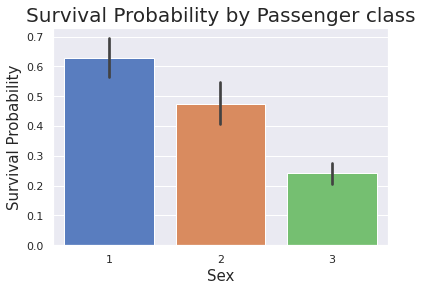

In [21]:
sns.barplot(x = "Pclass",y = "Survived", data = train, palette = "muted")
plt.xlabel("Sex",fontsize=15)
plt.ylabel("Survival Probability",fontsize=15)
plt.title("Survival Probability by Passenger class", fontsize=20)
plt.show()

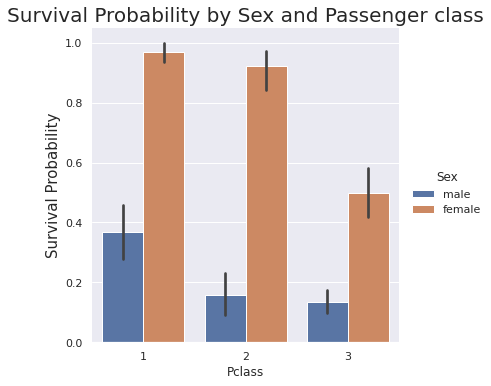

In [22]:
# Survival by gender and passenger class
plot = sns.factorplot(x = 'Pclass', y = 'Survived', hue = 'Sex',
                     data = train, kind = 'bar') #,color = )
plot.despine(left = True)
plt.ylabel("Survival Probability",fontsize=15)
plt.title("Survival Probability by Sex and Passenger class", fontsize=20)
plt.show()

# Categorical variable : Embarked

In [23]:
train["Embarked"].value_counts(dropna = False)


S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [24]:
# Mean of survival by passenger class
train[['Embarked','Survived']].groupby('Embarked',as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


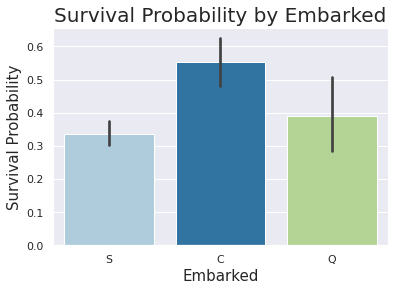

In [25]:
color = sns.color_palette("ch:s=.25,rot=-.25", as_cmap=True)
sns.barplot(x = "Embarked",y = "Survived", data = train, palette = "Paired")
plt.xlabel("Embarked",fontsize=15)
plt.ylabel("Survival Probability",fontsize=15)
plt.title("Survival Probability by Embarked", fontsize=20)
plt.show()

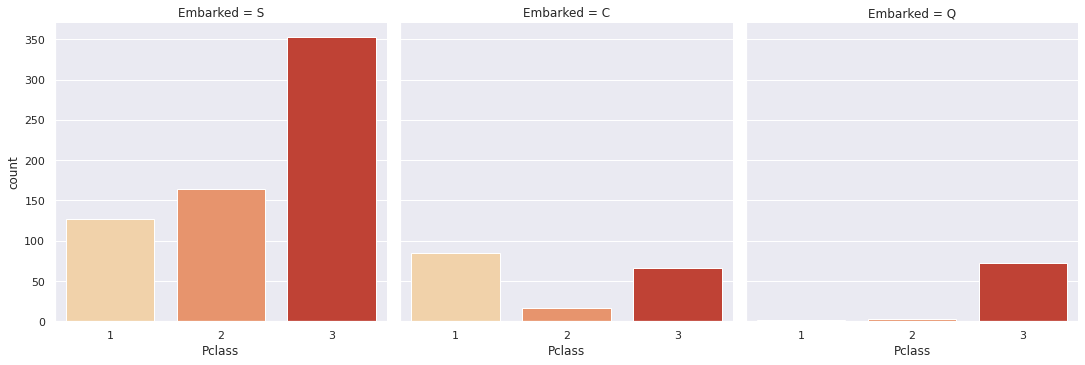

In [26]:
sns.factorplot('Pclass', col = 'Embarked', data = train, kind ='count', 
               palette = "OrRd")

# Survival probability by all categorical variables

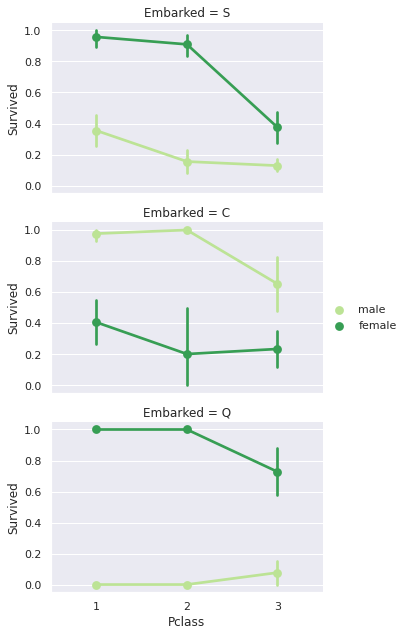

In [27]:
g = sns.FacetGrid(train, row = 'Embarked', size = 3, aspect = 1.6)
g.map(sns.pointplot,'Pclass','Survived','Sex', palette = 'YlGn')
g.add_legend()
plt.show()

# Numericals variables correlation with survival

<AxesSubplot:>

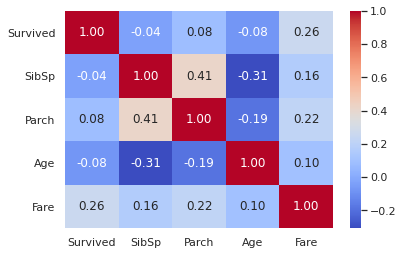

In [28]:
sns.heatmap(train[['Survived','SibSp','Parch','Age',
                        'Fare']].corr(), annot = True,
            fmt = '.2f', cmap = 'coolwarm')

# Numerical variable : SibSp

In [29]:
train['SibSp'].value_counts(dropna = False)

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [30]:
# Mean of survival by SibSp
train[['SibSp','Survived']].groupby('SibSp',
                                         as_index = False).mean().sort_values(by = 'Survived',
                                                                             ascending = False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


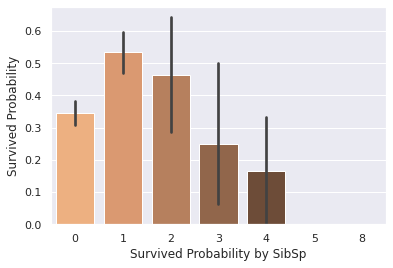

In [31]:
sns.barplot(x = 'SibSp', y = 'Survived', data =  train, 
            palette = "copper_r")
plt.ylabel('Survived Probability')
plt.xlabel('Survived Probability by SibSp')
plt.show()

# Numerical variable : Parch

In [32]:
train['Parch'].value_counts(dropna = False)

0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64

In [33]:
# Mean of survival by SibSp
train[['Parch','Survived']].groupby('Parch',
                                         as_index = False).mean().sort_values(by = 'Survived',
                                                                             ascending = False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


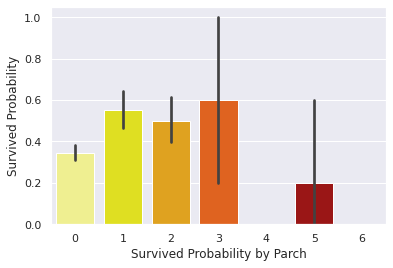

In [34]:
sns.barplot(x = 'Parch', y = 'Survived', data =  train, 
            palette = "hot_r")
plt.ylabel('Survived Probability')
plt.xlabel('Survived Probability by Parch')
plt.show()

# Numerical variable : Age

In [35]:
train["Age"].isnull().sum()

177

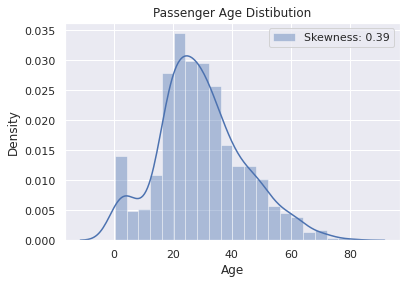

In [36]:
# Passenger age distribution
sns.distplot(train["Age"],label= 'Skewness: %.2f'%(train['Age'].skew()))
plt.legend(loc = 'best')
plt.title('Passenger Age Distibution')
plt.show()

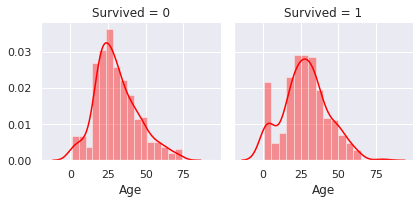

In [37]:
# Age distribution by survival
g = sns.FacetGrid(train, col = 'Survived')
g.map(sns.distplot,'Age', color = "red")
plt.show()

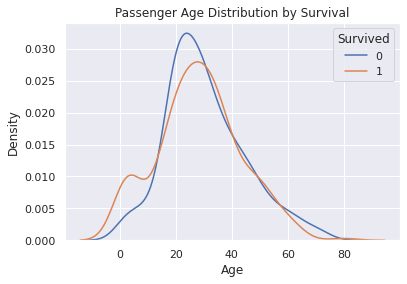

In [38]:
sns.kdeplot(train['Age'][train["Survived"]==0],
            hue = train["Survived"])
sns.kdeplot(train['Age'][train["Survived"]==1],
            hue = train["Survived"])
plt.xlabel('Age')
plt.title("Passenger Age Distribution by Survival")
plt.show()

In [39]:
train["Fare"].isnull().sum()

0

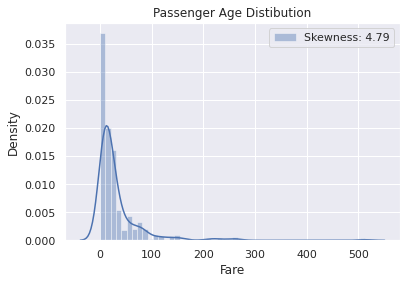

In [40]:
# Passenger by Fare 
sns.distplot(train["Fare"],label= 'Skewness: %.2f'%(train['Fare'].skew()))
plt.legend(loc = 'best')
plt.title('Passenger Age Distibution')
plt.show()

# Data Preprocessing

# drop and fill missing values

In [41]:
# droping ticket and cabin feature from train and test data
train = train.drop(['Ticket','Cabin'],axis = 1)
test = test.drop(['Ticket','Cabin'],axis = 1)

In [42]:
# Finding the most frequent value of Embarked in train
mode = train["Embarked"].dropna().mode()[0]
mode

'S'

In [43]:
# Fillinh missing values in Embarked with mode
train["Embarked"].fillna(mode, inplace = True)

In [44]:
# Missing values in test 
test.isnull().sum().sort_values(ascending = False)

Age            86
Fare            1
PassengerId     0
Pclass          0
Name            0
Sex             0
SibSp           0
Parch           0
Embarked        0
dtype: int64

In [45]:
# Computing Median of fare in test
median = test['Fare'].dropna().median()
median

14.4542

In [46]:
# Filling missing values in Fare with median
test['Fare'].fillna(median, inplace = True)

In [47]:
# Combining the train_dat and test
combine = pd.concat([train,test],axis = 0).reset_index(drop = True)
combine.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [48]:
# Missing values in the combined data
combine.isnull().sum().sort_values(ascending = False)

Survived       418
Age            263
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Fare             0
Embarked         0
dtype: int64

# Data Wrangling

In [49]:
combine["Sex"] = combine['Sex'].map({'male' : 0,'female' : 1})

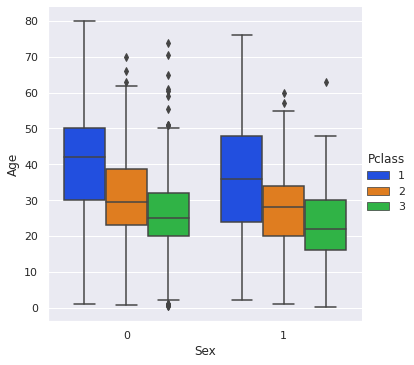

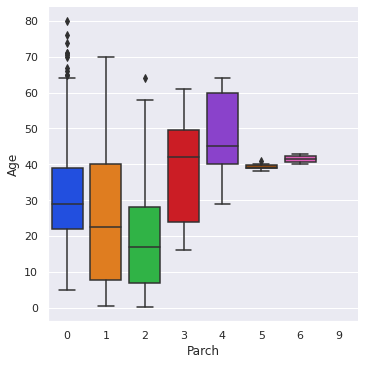

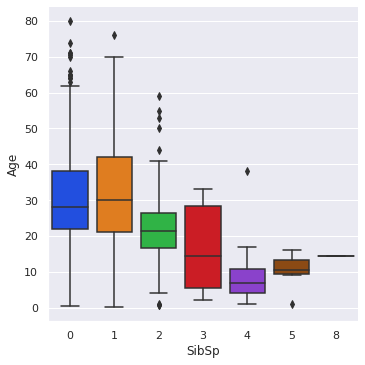

In [50]:
sns.factorplot(y = 'Age', x = 'Sex', hue = 'Pclass', kind = 'box',
              data = combine, palette = 'bright')
sns.factorplot(y = 'Age', x = 'Parch', kind = 'box', data = combine,
              palette = 'bright')
sns.factorplot(y = 'Age', x = 'SibSp', kind = 'box', data = combine,
              palette = 'bright')
plt.show()

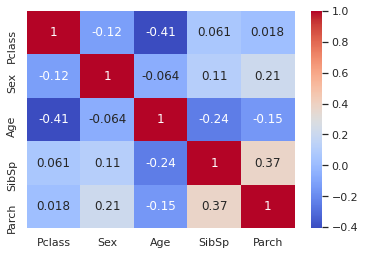

In [51]:
sns.heatmap(combine.drop(['Survived','Name','PassengerId','Fare'],
                       axis = 1).corr(), annot = True,cmap = 'coolwarm')
plt.show()

In [52]:
# check number of missing ages
age_nan_indices = list(combine[combine["Age"].isnull()].index)
len(age_nan_indices)

263

In [53]:
# loop through list and impute missing ages
for index in age_nan_indices:
    median_age = combine['Age'].median()
    predict_age = combine["Age"][(combine['SibSp'] == combine.iloc[index]['SibSp'])
                                & (combine['Parch'] == combine.iloc[index]['Parch'])
                                &(combine['Pclass'] == combine.iloc[index]['Pclass'])].median()
    if np.isnan(predict_age):
        combine["Age"].iloc[index] = median_age
    else:
        combine["Age"].iloc[index] = predict_age

In [54]:
combine["Age"].isnull().sum()

0

# Data Transformation

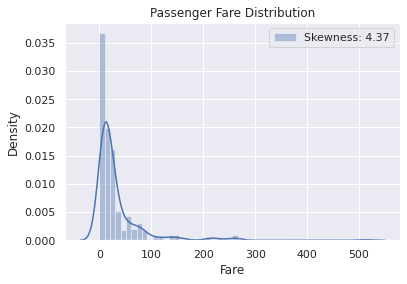

In [55]:
# passenger by Fare distribution
sns.distplot(combine['Fare'], label = 'Skewness: %.2f'%(combine["Fare"].skew()))
plt.legend(loc = 'best')
plt.title("Passenger Fare Distribution")
plt.show()

# Feature Engineering

In [56]:
# Get title from name
combine['Title'] = [name.split(",")[1].split('.')[0].strip() for name in 
                   combine["Name"]]
combine[['Name','Title']].head()

,Name,Title
0,"Braund, Mr. Owen Harris",Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
2,"Heikkinen, Miss. Laina",Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
4,"Allen, Mr. William Henry",Mr


In [57]:
combine["Title"].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Dr                8
Rev               8
Col               4
Ms                2
Major             2
Mlle              2
Dona              1
Lady              1
Sir               1
Don               1
Jonkheer          1
Mme               1
Capt              1
the Countess      1
Name: Title, dtype: int64

In [58]:
combine["Title"].nunique()

18

In [59]:
# Simplify title
combine["Title"] = combine["Title"].replace(['Dr','Rev','Col',
                                'Major','Lady','Jonkheer','Don',
                                 'the Countess','Sir','Dona'],'Rare')
combine['Title'] = combine['Title'].replace(['Mlle','Ms'],'Miss')
combine['Title'] = combine['Title'].replace('Mme','Mrs')

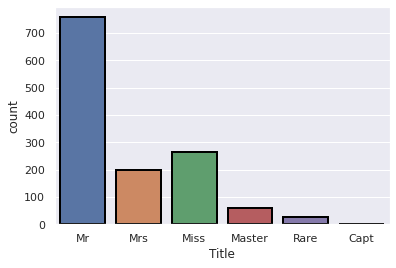

In [60]:
sns.countplot(combine["Title"], edgecolor=(0,0,0),
                  linewidth=2)
plt.show()

In [61]:
# Mean of survival by name title
combine[['Title','Survived']].groupby(['Title'],as_index = False).mean().sort_values(by = 'Survived',
                                                         ascending = False)
    

,Title,Survived
4,Mrs,0.793651
2,Miss,0.702703
1,Master,0.575000
5,Rare,0.363636
3,Mr,0.156673
0,Capt,0.000000


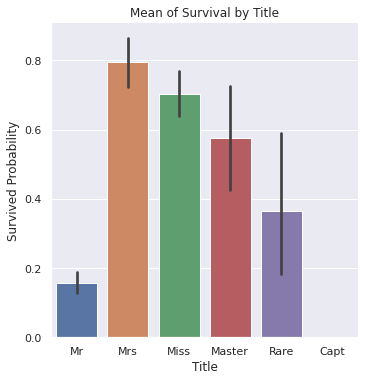

In [62]:
sns.factorplot(x = 'Title', y = 'Survived', data = combine, kind = 'bar')
plt.ylabel("Survived Probability")
plt.title("Mean of Survival by Title")
plt.show()

In [63]:
# Drop Name column
combine = combine.drop(['Name'],axis = 1)
combine.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0.0,3,0,22.0,1,0,7.2500,S,Mr
1,2,1.0,1,1,38.0,1,0,71.2833,C,Mrs
2,3,1.0,3,1,26.0,0,0,7.9250,S,Miss
3,4,1.0,1,1,35.0,1,0,53.1000,S,Mrs
4,5,0.0,3,0,35.0,0,0,8.0500,S,Mr
5,6,0.0,3,0,25.0,0,0,8.4583,Q,Mr
6,7,0.0,1,0,54.0,0,0,51.8625,S,Mr
7,8,0.0,3,0,2.0,3,1,21.0750,S,Master
8,9,1.0,3,1,27.0,0,2,11.1333,S,Mrs
9,10,1.0,2,1,14.0,1,0,30.0708,C,Mrs


# IsAlone

In [64]:
# Calculate family size from SibSp and Parch
combine["Family Size"] = combine["SibSp"] + combine["Parch"] + 1
combine[["SibSp","Parch","Family Size"]].head(10)

,SibSp,Parch,Family Size
0,1,0,2
1,1,0,2
2,0,0,1
3,1,0,2
4,0,0,1
5,0,0,1
6,0,0,1
7,3,1,5
8,0,2,3
9,1,0,2


In [65]:
# Mean of survival by family size
combine[['Family Size','Survived']].groupby('Family Size', 
                                            as_index = False).mean().sort_values(by = 'Survived',
                                                                                 ascending = False)

,Family Size,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [66]:
# Create a IsAlone feature
combine["IsAlone"] = 0
combine.loc[combine["Family Size"] == 1,'IsAlone'] = 1

In [67]:
# Mean of survival by IsAlone
combine[["IsAlone","Survived"]].groupby('IsAlone', as_index = False).mean().sort_values(by = 'Survived',
                                                                                       ascending = False)

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [68]:
combine = combine.drop(['SibSp','Parch','Family Size'], axis = 1)
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,1,0.0,3,0,22.0,7.2500,S,Mr,0
1,2,1.0,1,1,38.0,71.2833,C,Mrs,0
2,3,1.0,3,1,26.0,7.9250,S,Miss,1
3,4,1.0,1,1,35.0,53.1000,S,Mrs,0
4,5,0.0,3,0,35.0,8.0500,S,Mr,1


In [69]:
# Age*Class
combine["Age Band"] = pd.cut(combine["Age"],5)
combine[['Age Band','Survived']].groupby('Age Band', as_index = False).mean().sort_values(by = 
                                                                        'Age Band')

,Age Band,Survived
0,"(0.0902, 16.136]",0.500000
1,"(16.136, 32.102]",0.341719
2,"(32.102, 48.068]",0.412844
3,"(48.068, 64.034]",0.434783
4,"(64.034, 80.0]",0.090909


In [70]:
# Assign ordinals to each Age Band
combine.loc[combine["Age"] <= 16.136, 'Age'] = 0
combine.loc[(combine['Age'] > 16.136) & (combine['Age'] <= 32.102),'Age'] = 1
combine.loc[(combine['Age'] > 32.102) & (combine['Age'] <= 48.068),'Age'] = 2
combine.loc[(combine['Age'] > 48.068) & (combine['Age'] <= 64.034),'Age'] = 3
combine.loc[combine["Age"] > 64.034, "Age"] = 4

In [71]:
# Drop Age Band feature
combine = combine.drop('Age Band', axis = 1)
combine

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,1,0.0,3,0,1.0,7.2500,S,Mr,0
1,2,1.0,1,1,2.0,71.2833,C,Mrs,0
2,3,1.0,3,1,1.0,7.9250,S,Miss,1
3,4,1.0,1,1,2.0,53.1000,S,Mrs,0
4,5,0.0,3,0,2.0,8.0500,S,Mr,1
...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,0,1.0,8.0500,S,Mr,1
1305,1306,NaN,1,1,2.0,108.9000,C,Rare,1
1306,1307,NaN,3,0,2.0,7.2500,S,Mr,1
1307,1308,NaN,3,0,1.0,8.0500,S,Mr,1


In [72]:
# Age and Pclass data types
combine[["Age", "Pclass"]].dtypes

Age       float64
Pclass      int64
dtype: object

In [73]:
combine

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,1,0.0,3,0,1.0,7.2500,S,Mr,0
1,2,1.0,1,1,2.0,71.2833,C,Mrs,0
2,3,1.0,3,1,1.0,7.9250,S,Miss,1
3,4,1.0,1,1,2.0,53.1000,S,Mrs,0
4,5,0.0,3,0,2.0,8.0500,S,Mr,1
...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,0,1.0,8.0500,S,Mr,1
1305,1306,NaN,1,1,2.0,108.9000,C,Rare,1
1306,1307,NaN,3,0,2.0,7.2500,S,Mr,1
1307,1308,NaN,3,0,1.0,8.0500,S,Mr,1


In [74]:
# Convert Ordinal Age into Integer
combine["Age"] = combine["Age"].astype('int')
combine["Age"].dtype

dtype('int64')

In [75]:
# Create Age * Class Feature
combine["Age*Class"] = combine["Age"] * combine["Pclass"]
combine[["Age", "Pclass","Age*Class"]].head(10)

,Age,Pclass,Age*Class
0,1,3,3
1,2,1,2
2,1,3,3
3,2,1,2
4,2,3,6
5,1,3,3
6,3,1,3
7,0,3,0
8,1,3,3
9,0,2,0


# Feature Encoding

In [76]:
# Encode Title and Embarked feature
combine = pd.get_dummies(combine, columns = ["Title"])
combine = pd.get_dummies(combine, columns = ["Embarked"], prefix = 'Em')
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Capt,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,1,0.0,3,0,1,7.2500,0,3,0,0,0,1,0,0,0,0,1
1,2,1.0,1,1,2,71.2833,0,2,0,0,0,0,1,0,1,0,0
2,3,1.0,3,1,1,7.9250,1,3,0,0,1,0,0,0,0,0,1
3,4,1.0,1,1,2,53.1000,0,2,0,0,0,0,1,0,0,0,1
4,5,0.0,3,0,2,8.0500,1,6,0,0,0,1,0,0,0,0,1


In [77]:
# Divide fare into four bands
combine['Fare band'] = pd.cut(combine["Fare"], 4)
combine[["Fare band","Survived"]].groupby(['Fare band'],as_index = False).mean().sort_values(by = 'Fare band')

,Fare band,Survived
0,"(-0.512, 128.082]",0.368113
1,"(128.082, 256.165]",0.724138
2,"(256.165, 384.247]",0.666667
3,"(384.247, 512.329]",1.000000


In [78]:
# Assign ordinals to each Age Band
combine.loc[combine["Fare"] <= 128.0, 'Fare'] = 0
combine.loc[(combine['Fare'] > 128.0) & (combine['Fare'] <= 256.0),'Fare'] = 1
combine.loc[(combine['Fare'] > 256.0) & (combine['Fare'] <= 384.0),'Fare'] = 2
combine.loc[combine['Fare'] > 384.0,'Fare'] = 3

In [79]:
# convert Fare into integer
combine["Fare"] = combine["Fare"].astype('int')
combine["Fare"]

0       0
1       0
2       0
3       0
4       0
       ..
1304    0
1305    0
1306    0
1307    0
1308    0
Name: Fare, Length: 1309, dtype: int64

In [80]:
# Droping Fare band feature
combine = combine.drop('Fare band',axis = 1)

In [81]:
combine.head(10)

,PassengerId,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Capt,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,1,0.0,3,0,1,0,0,3,0,0,0,1,0,0,0,0,1
1,2,1.0,1,1,2,0,0,2,0,0,0,0,1,0,1,0,0
2,3,1.0,3,1,1,0,1,3,0,0,1,0,0,0,0,0,1
3,4,1.0,1,1,2,0,0,2,0,0,0,0,1,0,0,0,1
4,5,0.0,3,0,2,0,1,6,0,0,0,1,0,0,0,0,1
5,6,0.0,3,0,1,0,1,3,0,0,0,1,0,0,0,1,0
6,7,0.0,1,0,3,0,1,3,0,0,0,1,0,0,0,0,1
7,8,0.0,3,0,0,0,0,0,0,1,0,0,0,0,0,0,1
8,9,1.0,3,1,1,0,0,3,0,0,0,0,1,0,0,0,1
9,10,1.0,2,1,0,0,0,0,0,0,0,0,1,0,1,0,0


In [82]:
train = combine[:len(train)]
test = combine[len(train):]

In [83]:
train.head(10)

,PassengerId,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Capt,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,1,0.0,3,0,1,0,0,3,0,0,0,1,0,0,0,0,1
1,2,1.0,1,1,2,0,0,2,0,0,0,0,1,0,1,0,0
2,3,1.0,3,1,1,0,1,3,0,0,1,0,0,0,0,0,1
3,4,1.0,1,1,2,0,0,2,0,0,0,0,1,0,0,0,1
4,5,0.0,3,0,2,0,1,6,0,0,0,1,0,0,0,0,1
5,6,0.0,3,0,1,0,1,3,0,0,0,1,0,0,0,1,0
6,7,0.0,1,0,3,0,1,3,0,0,0,1,0,0,0,0,1
7,8,0.0,3,0,0,0,0,0,0,1,0,0,0,0,0,0,1
8,9,1.0,3,1,1,0,0,3,0,0,0,0,1,0,0,0,1
9,10,1.0,2,1,0,0,0,0,0,0,0,0,1,0,1,0,0


In [84]:
# Drop passenger ID column from and training set
train = train.drop('PassengerId', axis = 1)
train.head()

,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Capt,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,0.0,3,0,1,0,0,3,0,0,0,1,0,0,0,0,1
1,1.0,1,1,2,0,0,2,0,0,0,0,1,0,1,0,0
2,1.0,3,1,1,0,1,3,0,0,1,0,0,0,0,0,1
3,1.0,1,1,2,0,0,2,0,0,0,0,1,0,0,0,1
4,0.0,3,0,2,0,1,6,0,0,0,1,0,0,0,0,1


In [85]:
#Converting survived back to integer
train["Survived"] = train["Survived"].astype('int')
train.head()

,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Capt,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,0,3,0,1,0,0,3,0,0,0,1,0,0,0,0,1
1,1,1,1,2,0,0,2,0,0,0,0,1,0,1,0,0
2,1,3,1,1,0,1,3,0,0,1,0,0,0,0,0,1
3,1,1,1,2,0,0,2,0,0,0,0,1,0,0,0,1
4,0,3,0,2,0,1,6,0,0,0,1,0,0,0,0,1


In [86]:
test.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Capt,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
891,892,NaN,3,0,2,0,1,6,0,0,0,1,0,0,0,1,0
892,893,NaN,3,1,2,0,0,6,0,0,0,0,1,0,0,0,1
893,894,NaN,2,0,3,0,1,6,0,0,0,1,0,0,0,1,0
894,895,NaN,3,0,1,0,1,3,0,0,0,1,0,0,0,0,1
895,896,NaN,3,1,1,0,0,3,0,0,0,0,1,0,0,0,1


In [87]:
# Droping the Survived nad PssengerId
test  = test.drop(["Survived"],axis = 1)
test.head()

,PassengerId,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Capt,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
891,892,3,0,2,0,1,6,0,0,0,1,0,0,0,1,0
892,893,3,1,2,0,0,6,0,0,0,0,1,0,0,0,1
893,894,2,0,3,0,1,6,0,0,0,1,0,0,0,1,0
894,895,3,0,1,0,1,3,0,0,0,1,0,0,0,0,1
895,896,3,1,1,0,0,3,0,0,0,0,1,0,0,0,1


In [88]:
updated = pd.concat([train, test], axis = 0).reset_index(drop = True)
updated

,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Capt,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S,PassengerId
0,0.0,3,0,1,0,0,3,0,0,0,1,0,0,0,0,1,NaN
1,1.0,1,1,2,0,0,2,0,0,0,0,1,0,1,0,0,NaN
2,1.0,3,1,1,0,1,3,0,0,1,0,0,0,0,0,1,NaN
3,1.0,1,1,2,0,0,2,0,0,0,0,1,0,0,0,1,NaN
4,0.0,3,0,2,0,1,6,0,0,0,1,0,0,0,0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,3,0,1,0,1,3,0,0,0,1,0,0,0,0,1,1305.0
1305,NaN,1,1,2,0,1,2,0,0,0,0,0,1,1,0,0,1306.0
1306,NaN,3,0,2,0,1,6,0,0,0,1,0,0,0,0,1,1307.0
1307,NaN,3,0,1,0,1,3,0,0,0,1,0,0,0,0,1,1308.0


# Spliting the data into Training and Testing set

In [89]:
X_train = train.drop("Survived",axis = 1)
y_train = train["Survived"]
X_test = test.drop('PassengerId',axis = 1).copy()

In [90]:
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)

X_train shape:  (891, 15)
X_test shape:  (418, 15)
y_train shape:  (891,)


# Modeling

  # 1.Logistic Regression

In [91]:
from sklearn.linear_model import LogisticRegression

In [92]:
lr = LogisticRegression(random_state = 0)
lr.fit(X_train,y_train)
predictions1 = lr.predict(X_test)

In [93]:
lr.score(X_train,y_train)

0.8013468013468014

# 2. Support Vector Machine

In [94]:
from sklearn.svm import SVC

In [95]:
svc = SVC()
svc.fit(X_train,y_train)
predictions2 = svc.predict(X_test)

In [96]:
svc.score(X_train,y_train)

0.8282828282828283

# 3. Perceptron

In [97]:
from sklearn.linear_model import Perceptron

In [98]:
perceptron = Perceptron()
perceptron.fit(X_train,y_train)
predictions3 = perceptron.predict(X_test)

In [99]:
perceptron.score(X_train,y_train)

0.590347923681257

# 4. SGDClassifier

In [100]:
from sklearn.linear_model import SGDClassifier

In [101]:
sgd = SGDClassifier()
sgd.fit(X_train,y_train)
predictions4 = sgd.predict(X_test)

In [102]:
sgd.score(X_train,y_train)

0.7968574635241302

# 5. Random Forest Classifier

In [103]:
from sklearn.ensemble import RandomForestClassifier

In [104]:
random_forest  = RandomForestClassifier()
random_forest.fit(X_train,y_train)
predictions5 = random_forest.predict(X_test)

In [105]:
random_forest.score(X_train,y_train)

0.8484848484848485

# 6. KNeighbors Classifier

In [106]:
from sklearn.neighbors import KNeighborsClassifier

In [107]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
predictions6 = knn.predict(X_test)

In [108]:
knn.score(X_train,y_train)

0.8417508417508418

# 7. Decision Tree Classifier

In [109]:
from sklearn.tree import DecisionTreeClassifier

In [110]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train,y_train)
predictions7 = decision_tree.predict(X_test)

In [111]:
decision_tree.score(X_train,y_train)

0.8484848484848485

# 8. Linear SVC 

In [112]:
from sklearn.svm import LinearSVC

In [113]:
linear_svc = LinearSVC()
linear_svc.fit(X_train,y_train)
predictions8 = linear_svc.predict(X_test)

In [114]:
linear_svc.score(X_train,y_train)

0.8035914702581369

# 9. Naive Byes

In [115]:
from sklearn.naive_bayes import GaussianNB

In [116]:
naive = GaussianNB()
naive.fit(X_train,y_train)
predictions9 = naive.predict(X_test)

In [117]:
naive.score(X_train,y_train)

0.6924803591470258

# 10. Boosting

In [118]:
from catboost import CatBoostClassifier

In [119]:
catboost = CatBoostClassifier()
catboost.fit(X_train,y_train)
predictions10 = catboost.predict(X_test)

Learning rate set to 0.009807
0:	learn: 0.6869746	total: 53.6ms	remaining: 53.6s
1:	learn: 0.6808097	total: 59.3ms	remaining: 29.6s
2:	learn: 0.6742626	total: 62.5ms	remaining: 20.8s
3:	learn: 0.6692649	total: 64.5ms	remaining: 16.1s
4:	learn: 0.6643327	total: 66ms	remaining: 13.1s
5:	learn: 0.6586309	total: 67.8ms	remaining: 11.2s
6:	learn: 0.6546631	total: 68.5ms	remaining: 9.71s
7:	learn: 0.6487666	total: 69.3ms	remaining: 8.59s
8:	learn: 0.6432803	total: 70ms	remaining: 7.71s
9:	learn: 0.6378874	total: 70.8ms	remaining: 7.01s
10:	learn: 0.6322461	total: 71.9ms	remaining: 6.46s
11:	learn: 0.6280874	total: 72.5ms	remaining: 5.97s
12:	learn: 0.6235565	total: 73.5ms	remaining: 5.58s
13:	learn: 0.6194174	total: 74.8ms	remaining: 5.27s
14:	learn: 0.6148256	total: 76.5ms	remaining: 5.03s
15:	learn: 0.6099745	total: 78.1ms	remaining: 4.8s
16:	learn: 0.6058705	total: 79.7ms	remaining: 4.61s
17:	learn: 0.6013533	total: 81.2ms	remaining: 4.43s
18:	learn: 0.5982312	total: 82.9ms	remaining: 4.2

In [120]:
catboost.score(X_train,y_train)

0.8473625140291807

# Model Evaluation and Hyperparameter

In [121]:
from sklearn.model_selection import cross_val_score

# Training Accuracy

In [122]:
models = pd.DataFrame({"Model" : ['Support vector Machines','KNN',
                                 'Logistic Regression','Random Forest',
                                 'Naive Bayes','Perceptron',
                                  'Stochastic Gradient Descent',
                                  'Linear SVC','Decision tree',
                                  'Cat Boost'],
                       'Score':[svc.score(X_train,y_train),
                                knn.score(X_train,y_train),
                               lr.score(X_train,y_train),
                               random_forest.score(X_train,y_train),
                               naive.score(X_train,y_train),
                               perceptron.score(X_train,y_train),
                               sgd.score(X_train,y_train),
                               linear_svc.score(X_train,y_train),
                               decision_tree.score(X_train,y_train),
                               catboost.score(X_train,y_train)]})
models.sort_values(by = 'Score', ascending = False, ignore_index = True)

,Model,Score
0,Random Forest,0.848485
1,Decision tree,0.848485
2,Cat Boost,0.847363
3,KNN,0.841751
4,Support vector Machines,0.828283
5,Linear SVC,0.803591
6,Logistic Regression,0.801347
7,Stochastic Gradient Descent,0.796857
8,Naive Bayes,0.692480
9,Perceptron,0.590348


# K-Fold cross validation

In [123]:
classifiers = []
classifiers.append(LogisticRegression())
classifiers.append(SVC())
classifiers.append(KNeighborsClassifier())
classifiers.append(GaussianNB())
classifiers.append(Perceptron())
classifiers.append(LinearSVC())
classifiers.append(SGDClassifier())
classifiers.append(DecisionTreeClassifier())
classifiers.append(RandomForestClassifier())
classifiers.append(CatBoostClassifier())
len(classifiers)

10

In [124]:
cv_results = []
for classifier in classifiers:
    cv_results.append(cross_val_score(classifier,X_train,y_train,
                                     scoring='accuracy',cv=10))

Learning rate set to 0.009371
0:	learn: 0.6871751	total: 940us	remaining: 939ms
1:	learn: 0.6812557	total: 2.06ms	remaining: 1.03s
2:	learn: 0.6748066	total: 3.14ms	remaining: 1.04s
3:	learn: 0.6699392	total: 3.87ms	remaining: 963ms
4:	learn: 0.6651830	total: 4.5ms	remaining: 895ms
5:	learn: 0.6596148	total: 5.31ms	remaining: 880ms
6:	learn: 0.6557045	total: 5.93ms	remaining: 841ms
7:	learn: 0.6502105	total: 6.75ms	remaining: 837ms
8:	learn: 0.6458511	total: 7.4ms	remaining: 815ms
9:	learn: 0.6415649	total: 8.09ms	remaining: 801ms
10:	learn: 0.6365091	total: 8.87ms	remaining: 797ms
11:	learn: 0.6322942	total: 9.68ms	remaining: 797ms
12:	learn: 0.6275948	total: 10.5ms	remaining: 795ms
13:	learn: 0.6233682	total: 11.2ms	remaining: 792ms
14:	learn: 0.6187159	total: 12.1ms	remaining: 793ms
15:	learn: 0.6148359	total: 12.8ms	remaining: 786ms
16:	learn: 0.6102393	total: 13.6ms	remaining: 785ms
17:	learn: 0.6076823	total: 14.1ms	remaining: 771ms
18:	learn: 0.6035346	total: 14.8ms	remaining: 7

# Mean and Standard deviation of cross validation results

In [125]:
cv_mean = []
cv_std = []
for cv_result in cv_results:
    cv_mean.append(cv_result.mean())
    cv_std.append(cv_result.std())

In [126]:
cv = pd.DataFrame({'Cross Validation Mean': cv_mean,
                   'Cross Validation Std': cv_std,
                   'Models':['Logistic Regression','Support Vector Machine',
                             'KNN','GausianNB','Perceptron',
                            'Linear SVC','Stochastic Gradient Descent',
                             'Decision Tree','Random Forest','Cat Boost']})
cv.sort_values(by = 'Cross Validation Mean',ascending = False, 
               ignore_index = True)

,Cross Validation Mean,Cross Validation Std,Models
0,0.818227,0.036918,Cat Boost
1,0.809251,0.034846,Random Forest
2,0.808127,0.036776,Support Vector Machine
3,0.808115,0.037207,KNN
4,0.803620,0.027392,Linear SVC
5,0.801386,0.040607,Decision Tree
6,0.801361,0.023991,Logistic Regression
7,0.726205,0.086999,Stochastic Gradient Descent
8,0.676841,0.063253,GausianNB
9,0.671049,0.173850,Perceptron


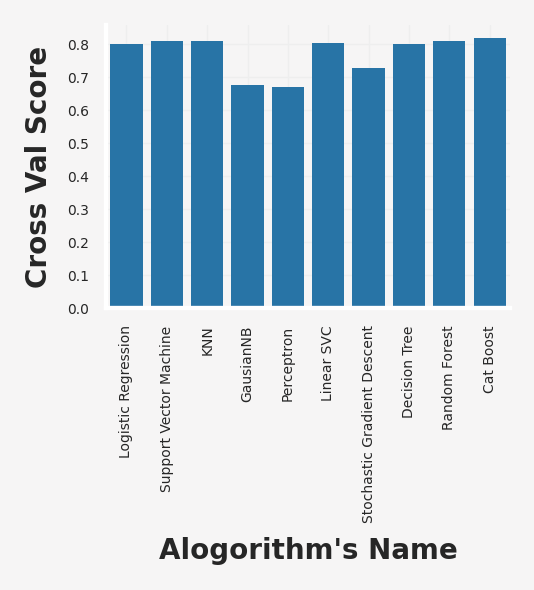

In [127]:
plt.rcParams['figure.dpi'] = 250
fig = plt.figure(figsize=(5, 1.5), facecolor='#f6f5f5')
fig.tight_layout(pad=100)
gs = fig.add_gridspec(1, 2)
gs.update(wspace=0.4, hspace=10)


background_color = "#f6f5f5"
sns.set_palette(['#00A4CCFF']*6)

ax = fig.add_subplot(gs[0, 0])
for s in ["right", "top"]:
    ax.spines[s].set_visible(False)
ax.set_facecolor(background_color)
ax_sns = sns.barplot(ax=ax, x=cv['Models'], 
                      y=cv['Cross Validation Mean'], 
                      zorder=2, linewidth=0, alpha=1, saturation=1, color = '#2874A6')
ax_sns.set_ylabel("Cross Val Score",fontsize=8, weight='bold')
plt.xticks(rotation = 90)
ax_sns.set_xlabel("Alogorithm's Name",fontsize=8, weight='bold')
ax_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
ax_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)
ax_sns.tick_params(labelsize=4, width=0.5, length=1.5)



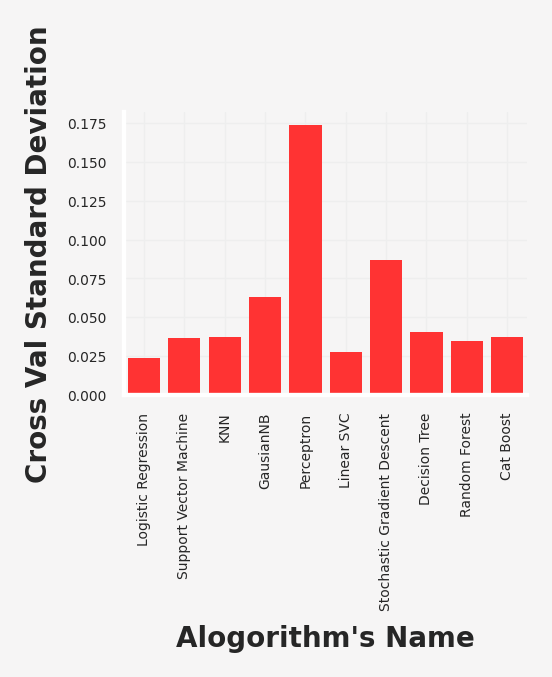

In [128]:
plt.rcParams['figure.dpi'] = 250
fig = plt.figure(figsize=(5, 1.5), facecolor='#f6f5f5')
fig.tight_layout(pad=100)
gs = fig.add_gridspec(1, 2)
gs.update(wspace=0.4, hspace=10)


background_color = "#f6f5f5"
sns.set_palette(['#00A4CCFF']*6)

ax = fig.add_subplot(gs[0, 0])
for s in ["right", "top"]:
    ax.spines[s].set_visible(False)
ax.set_facecolor(background_color)
ax_sns = sns.barplot(ax=ax, x=cv['Models'], 
                      y=cv['Cross Validation Std'], 
                      zorder=2, linewidth=0, alpha=1, saturation=1, color = '#ff3333')
ax_sns.set_ylabel("Cross Val Standard Deviation",fontsize=8, weight='bold')
plt.xticks(rotation = 90)
ax_sns.set_xlabel("Alogorithm's Name",fontsize=8, weight='bold')
ax_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
ax_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)
ax_sns.tick_params(labelsize=4, width=0.5, length=1.5)



# Hyperparameter Tuning for SVM

In [129]:
from sklearn.model_selection import GridSearchCV

In [130]:
param_grid = {'C': [0.1,1,10,100,1000],
             'gamma':[1,0.1,0.01,0.001,0.0001],
             'kernel': ['rbf']}
grid = GridSearchCV(SVC(),param_grid, refit = True, verbose = 3)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.793, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.809, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.798, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.770, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.781, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.804, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.809, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.787, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.764, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.809, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.698, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.753, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.674, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    4.2s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [131]:
print("Best paramters: ",grid.best_params_)
print("Best estimator: ",grid.best_estimator_)

Best paramters:  {'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}
Best estimator:  SVC(C=1000, gamma=0.01)


In [132]:
# Trainig Accuracy
svc = SVC(C = 100, gamma = 0.01, kernel = 'rbf')
svc.fit(X_train,y_train)
y_prediction = svc.predict(X_test)
s = svc.score(X_train,y_train)
print("Our SVC Training Accuracy Score increase ",s)

Our SVC Training Accuracy Score increase  0.8338945005611672


In [133]:
y_prediction

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [134]:
len(y_prediction)

418

In [135]:
final_submission = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': y_prediction})
final_submission

,PassengerId,Survived
891,892,0
892,893,0
893,894,0
894,895,0
895,896,0
...,...,...
1304,1305,0
1305,1306,1
1306,1307,0
1307,1308,0


In [136]:
final_submission.shape

(418, 2)

In [137]:
final_submission.to_csv("Titanic.csv",index=False)